# 2. Data analysis and exploration


The following notebook contains a data analysis for the project **"Traffic accidents in Barcelona: data analysis and modelling"**. The results and findings will be comment in our page: https://capstoneproject2021-ub.github.io/Traffic-Accidents-in-Barcelona/

* We used both dataframes resulting from the notebook "N° 1: ETL".

* For the data visualization, we worked with **Plotly Python Graphing Library** (https://plotly.com/)

* For the interactive maps, we used a **Folium**. A Python library for visualizing geospatial data (https://python-visualization.github.io/folium/quickstart.html)

In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
import chart_studio.plotly as py
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import folium
from folium import plugins
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

#pd.options.plotting.backend = "plotly"

## <div align="center"> Dataframe 2: "Accidents managed by the local police in the city of Barcelona" (2010-2020)</p>

In [2]:

df_accidents_lp = pd.read_csv('accidents_localpolice_homogenized_2010to2020.csv', delimiter=',', encoding='latin1')
df_accidents_lp 


C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.



,any,codi_barri,codi_carrer,codi_districte,coordenada_utm_x,coordenada_utm_y,descripcio_causa_vianant,dia_mes,dia_setmana,hora_dia,...,nom_carrer,nom_districte,numero_expedient,numero_lesionats_greus,numero_lesionats_lleus,numero_morts,numero_vehicles_implicats,numero_victimes,Full_Date,COVID
0,2010,101-10-64,209900,10,"432017,96","4584941,35",Desconegut,28,5,19,...,Meridiana,Sant Marti,2010S003688,0,0,0,1,0,20100528,0.0
1,2010,101-10-64,346402,10,"432014,69","4585041,70",Desconegut,8,1,11,...,Trinxant,Sant Marti,2010S007597,0,1,0,2,1,20101108,0.0
2,2010,101-10-64,297001,10,"431401,23","4585117,42",Desconegut,25,4,13,...,Sant Antoni Maria Claret,Sant Marti,2010S001390,0,1,0,1,1,20100225,0.0
3,2010,101-10-64,134801,10,"431397,75","4584596,60",Desconegut,3,2,14,...,Freser,Sant Marti,2010S005416,0,1,0,2,1,20100803,0.0
4,2010,101-10-64,161407,10,"431391,10","4584932,86",Desconegut,24,5,14,...,IndÃºstria,Sant Marti,2010S008924,0,2,0,2,2,20101224,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102990,2020,73-7-37,182600,7,4.58641e+06,429663,Desconegut,31,4,17,...,LluÃ­s MariÃ Vidal,Horta-Guinardo,2020S006274,0,0,0,1,0,20201231,10.0
102991,2020,21-2-10,323203,2,4.58188e+06,430126,Desconegut,31,4,20,...,SepÃºlveda,Eixample,2020S006275,0,2,0,2,2,20201231,10.0
102992,2020,12-1-2,701266,1,4.58108e+06,431410,Desconegut,31,4,13,...,Litoral (Llobregat),Ciutat Vella,2020S006276,0,2,0,2,2,20201231,10.0
102993,2020,22-2-9,18505,2,4.58195e+06,429363,Desconegut,31,4,21,...,AragÃ³,Eixample,2020S006277,0,2,0,1,2,20201231,10.0


## a) Preparing the data
<br>

In [3]:

#Change columns names
df_accidents_lp = df_accidents_lp.rename(columns={'any': 'year', 'dia_mes': 'day of the month', 'dia_setmana': 'day', 'hora_dia': 'hour','nom_carrer': 'street',
                                                  'nom_districte': 'district','numero_lesionats_greus': 'serious injuries',"descripcio_causa_vianant":"pedestrian fault",
                                                  'numero_lesionats_lleus': 'mild injuries',  'numero_morts': 'deaths',
                                                  'numero_victimes': 'total victims',"numero_vehicles_implicats":"vehicles involved"})

#Day names to the column "day"
df_accidents_lp["day"] =df_accidents_lp["day"].astype(str)

df_accidents_lp["day"].replace({"1": "Monday", "2": "Tuesday", "3": "Wednesday", "4": "Thursday",
                       "5": "Friday", "6": "Saturday","7": "Sunday"}, inplace=True)

#No consider accidents without vehicles
df_accidents_lp.drop(df_accidents_lp[df_accidents_lp['vehicles involved'] == 0].index, inplace = True)
df_accidents_lp.head()

,year,codi_barri,codi_carrer,codi_districte,coordenada_utm_x,coordenada_utm_y,pedestrian fault,day of the month,day,hour,...,street,district,numero_expedient,serious injuries,mild injuries,deaths,vehicles involved,total victims,Full_Date,COVID
0,2010,101-10-64,209900,10,"432017,96","4584941,35",Desconegut,28,Friday,19,...,Meridiana,Sant Marti,2010S003688,0,0,0,1,0,20100528,0.0
1,2010,101-10-64,346402,10,"432014,69","4585041,70",Desconegut,8,Monday,11,...,Trinxant,Sant Marti,2010S007597,0,1,0,2,1,20101108,0.0
2,2010,101-10-64,297001,10,"431401,23","4585117,42",Desconegut,25,Thursday,13,...,Sant Antoni Maria Claret,Sant Marti,2010S001390,0,1,0,1,1,20100225,0.0
3,2010,101-10-64,134801,10,"431397,75","4584596,60",Desconegut,3,Tuesday,14,...,Freser,Sant Marti,2010S005416,0,1,0,2,1,20100803,0.0
4,2010,101-10-64,161407,10,"431391,10","4584932,86",Desconegut,24,Friday,14,...,IndÃºstria,Sant Marti,2010S008924,0,2,0,2,2,20101224,0.0


## b) General approach - Evolution of the accidents between 2010 and 2020
<br>

In [4]:
g = df_accidents_lp[['serious injuries','mild injuries',"deaths",'total victims',"year"]].groupby("year").sum()
j = df_accidents_lp[['numero_expedient',"year"]].groupby("year").count() #Represents the total amount of accidents during the year
brief=pd.merge(g, j, left_index=True, right_index=True)

brief=brief.rename(columns={'numero_expedient':'total accidents'})
brief

,serious injuries,mild injuries,deaths,total victims,total accidents
year,,,,,
2010,265,10539,39,10843,9056
2011,219,10090,31,10340,8831
2012,248,10850,30,11128,9253
2013,260,11133,22,11415,9457
2014,251,11149,31,11431,9677
2015,199,11607,27,11833,9998
2016,192,11895,28,12115,10138
2017,241,11933,12,12186,10334
2018,236,11641,21,11898,9930


In [5]:
brief.iplot(kind='line',title="Accidents and consequences per year",xaxis_title="Year",yaxis_title="Accidents")

================================================================================

*Because of the different scale of the values, it is not possible to plot all the variables in the same chart*

================================================================================

In [6]:

#Make subplots
fig = make_subplots(rows=2, cols=2, start_cell="bottom-left")

fig.add_trace(go.Scatter(x=brief.index, y=brief['total victims'], name="(Total victims)"), row=1, col=1)

fig.add_trace(go.Scatter(x=brief.index, y=brief['deaths'], name="(Deaths)"), row=1, col=2)

fig.add_trace(go.Scatter(x=brief.index, y=brief['total accidents'], name="(Total accidents)"), row=2, col=1)

fig.add_trace(go.Scatter(x=brief.index, y=brief['serious injuries'], name="(Serious injuries)"), row=2, col=2)

fig.update_layout(title_text="specs examples")
fig.show()

================================================================================

*If we want to see the trend more in detail:*

================================================================================

In [7]:
#total accidents plot
brief['total accidents'].iplot(kind='line',title="Accidents per year",xaxis_title="Year",yaxis_title="Accidents")

In [8]:
#total deaths plot
brief['deaths'].iplot(kind='line',title="Deaths per year",xaxis_title="Year",yaxis_title="Deaths")

In [9]:
#Seroius injuries plot
brief['serious injuries'].iplot(kind='line',title="serious injuries per year",xaxis_title="Year",yaxis_title="serious injuries")

In [10]:
#mild injuries plot
brief['mild injuries'].iplot(kind='line',title="Mild injuries per year",xaxis_title="Year",yaxis_title="mild injuries")

In [11]:
#total victims plot
brief['total victims'].iplot(kind='line',title="Total victims per year",xaxis_title="Year",yaxis_title="total victims")

In [12]:
#Pie chart

pie_data = df_accidents_lp[['mild injuries','deaths','serious injuries']]
pie_data=pie_data.sum()

labels = ['mild injuries','deaths','serious injuries']
fig = go.Figure(data=[go.Pie(labels=labels, values=pie_data)])
fig.show()

## c) Statical distribution 
<br>

In [13]:
# Victims distribution along the hours of a day
part_data = df_accidents_lp[['mild injuries','serious injuries','deaths','total victims',"hour"]]
part_data=part_data.groupby("hour").sum()
part_data.iplot(kind='bar')

In [14]:
# Victims distribution along the days of a week
part_data = df_accidents_lp[['mild injuries','serious injuries','deaths','total victims',"day"]]
part_data=part_data.groupby("day").sum()
part_data=part_data.reindex(["Monday","Tuesday","Wenesday","Thursday","Friday","Saturday","Sunday"])

part_data.iplot(kind='bar')

In [15]:
# Victims distribution along the days of a week
part_data = df_accidents_lp[['mild injuries','serious injuries','deaths','total victims',"day of the month"]]
part_data=part_data.groupby('day of the month').sum()

part_data.iplot(kind='line')

In [16]:
# Accidents per district
part_data = df_accidents_lp[['mild injuries','serious injuries','deaths','total victims',"district"]]
pe=part_data.groupby("district").sum()
pe=pe.reindex(["Eixample","Sant Marti","Sarria-Sant Gervasi","Sants-Montjuic","Les Corts","Horta-Guinardo","Sant Andreu","Nou Barris","Ciutat Vella","Desconegut"])
pe.iplot(kind='bar')

In [17]:
# Number of vehicles involved per accident
brief = df_accidents_lp[['vehicles involved','numero_expedient']]
brief =brief.groupby("vehicles involved")["numero_expedient"].count()
labels = ["1 Vehicle","2 Vehicles", "3 Vehicles", "4 Vehicles","5 Vehicles"]
fig = go.Figure(data=[go.Pie(labels=labels, values=brief)])
fig.show()

### Correlation Matrix between variables
<br>

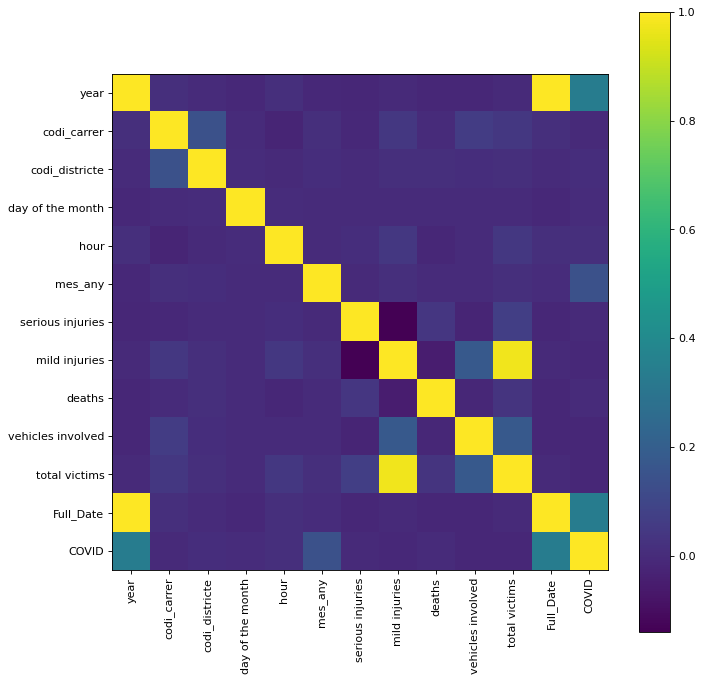

In [35]:
def plotCorrelationMatrix(df, graphWidth):

    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='g')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()


plotCorrelationMatrix(df_accidents_lp, 10)

## d) Accidents location: comparison 2019 vs 2020
<br>

In [64]:
from folium.features import DivIcon

#Dataframes 2019 and 2020
df_2020 = pd.read_csv('Dataset/local_police/2020_accidents_gu_bcn.csv', delimiter=',', encoding='latin1')
df_2019 = pd.read_csv('Dataset/local_police/2019_accidents_gu_bcn.csv', delimiter=',', encoding='latin1')


# Define a map 
barcelona = folium.Map(location=[41.38879, 2.17853], tiles='Stamen Terrain', 
                       attr="<a href=https://endless-sky.github.io/>Endless Sky</a>",zoom_start=12)



# Display location of fatal accidents 2019 and 2020

for lat, lng, label in zip(df_2020.Latitud, df_2020.Longitud, df_2020.Numero_morts.astype(str)):
    if label!="0":
        folium.features.CircleMarker([lat, lng],radius=7,color='Darkblue',fill=True,popup=label,
        fill_opacity=0.6).add_to(barcelona) #Display location 2020 - fatal accidents

        
for lat, lng, label in zip(df_2019.Latitud, df_2019.Longitud, df_2019.Numero_morts.astype(str)):
    if label!="0":
        folium.features.CircleMarker([lat, lng],radius=7,color='red',fill=True,popup=label,
        fill_opacity=0.6).add_to(barcelona) #Display location 2019 - fatal accidents

#Display location of serious injures accidents 2019 and 2020

for lat, lng, label in zip(df_2020.Latitud, df_2020.Longitud, df_2020.Numero_lesionats_greus.astype(str)):
    if label!="0":
        folium.features.Circle([lat, lng],radius=7,color='Darkblue',fill=True,popup=label,
        fill_opacity=0.6).add_to(barcelona) #Display location 2020 - serious injuries accidents

        
for lat, lng, label in zip(df_2019.Latitud, df_2019.Longitud, df_2019.Numero_lesionats_greus.astype(str)):
    if label!="0":
        folium.features.Circle([lat, lng],radius=7,color='red',fill=True,popup=label,
        fill_opacity=0.6).add_to(barcelona) #Display location 2019 - serious injuries accidents


folium.map.Marker(
    [41.38500, 2.21500],
    icon=DivIcon(
        icon_size=(250,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 12pt"> Red marker: Deaths 2019 <br> Red point: Serious injuries 2019 <br> Blue marker: Deaths 2020 <br> Blue point: Serious injuries 2020</div>',
        )
    ).add_to(barcelona)        

barcelona


===============================================================================================================

## <div align="center"> Dataframe 1: "People involved in accidents managed by the Police in the city of Barcelona" (2010-2020)</p>

In [22]:
df_people = pd.read_csv('accidents_homogenized_2010to2020.csv', delimiter=',', encoding='latin1')
df_people.head()


C:\Users\Leo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.



,any,codi_barri,codi_districte,coordenada_utm_x,coordenada_utm_y,desc_tipus_vehicle_implicat,descripcio_causa_vianant,descripcio_dia_setmana,descripcio_sexe,descripcio_tipus_persona,dia_mes,edat,hora_dia,mes_any,nom_barri,nom_districte,nom_mes,numero_expedient
0,2010,7,2,"431179,27","4583198,28",Motocicleta,No es causa del vianant,Divendres,Home,Conductor,1,30,7,1,la Dreta de l'Eixample,Eixample,Gener,2010S000001
1,2010,7,2,"431179,27","4583198,28",Motocicleta,No es causa del vianant,Divendres,Home,Conductor,1,39,7,1,la Dreta de l'Eixample,Eixample,Gener,2010S000001
2,2010,5,2,"431444,51","4583631,60",Ciclomotor,No es causa del vianant,Divendres,Home,Conductor,1,39,14,1,el Fort Pienc,Eixample,Gener,2010S000002
3,2010,61,9,"432062,05","4586479,84",Motocicleta,No es causa del vianant,Divendres,Home,Conductor,1,34,20,1,la Sagrera,Sant Andreu,Gener,2010S000005
4,2010,67,10,"432826,97","4582584,02",Turismo,No es causa del vianant,Divendres,Dona,Conductor,1,32,21,1,la Vila Olimpica del Poblenou,Sant Marti,Gener,2010S000006


## a) Preparing the data
<br>

In [23]:
#Change columns names
df_people = df_people.rename(columns={'any': 'year', 'dia_mes': 'day of the month', 'descripcio_dia_setmana': 'day', 'hora_dia': 'hour','nom_carrer': 'street',
                                                  'nom_districte': 'district','desc_tipus_vehicle_implicat': 'type of vehicle',"descripcio_causa_vianant":"pedestrian fault",
                                                  'descripcio_sexe': 'sex',  'descripcio_tipus_persona': 'description person',"edat" : "edad"})

#Homogenize values

df_people["day"].replace({"Dilluns": "Monday", "Dimarts": "Tuesday", "Dimecres": "Wednesday", "Dijous": "Thursday",
                       "Divendres": "Friday", "Dissabte": "Saturday","Diumenge": "Sunday"}, inplace=True)

df_people["description person"].replace({"Conductor": "Driver", "Passatger": "Passenger", "Vianant": "Pedestrian"}, 
                                        inplace=True)

df_people["type of vehicle"].replace({"Turisme": "Tourism", "Turismo": "Tourism", "Tren o tramvia": "Train or Tram",
                                     "Tranvia o tren":"Train or Tram","Tranva o tren" :"Train or Tram", "Tractor camio": "Tractor Truck",
                                     "Tractocamin": "Tractor Truck", "Tractocamion": "Tractor Truck", "Altres vehicles amb motor":"Other",
                                     "Altres vehicles sense motor":"Other","Otros vehc. a motor":"Other","Otros vehic. a motor":"Other", 
                                     "Cuadriciclo <75cc":"Quadricicle < 75 cc","Cuadriciclo >=75cc":"Quadricicle > 75 cc",
                                      "Autobs":"Bus","Autobus":"Bus","Autobs articulado":"Articulated bus",
                                      "Autobus articulat":"Articulated bus","Autobus articulado":"Articulated bus",
                                     "Ciclomotor":"Moped","Motocicleta":"Motorbike","Bicicleta":"Bicycle",
                                     "Furgoneta":"Van","Veh. mobilitat personal amb motor":"VMP"}, inplace=True)


#No consider accidents without vehicles
df_people.drop(df_people[df_people["description person"] == "Desconegut"].index, inplace = True)
df_people.head()

,year,codi_barri,codi_districte,coordenada_utm_x,coordenada_utm_y,type of vehicle,pedestrian fault,day,sex,description person,day of the month,edad,hour,mes_any,nom_barri,district,nom_mes,numero_expedient
0,2010,7,2,"431179,27","4583198,28",Motorbike,No es causa del vianant,Friday,Home,Driver,1,30,7,1,la Dreta de l'Eixample,Eixample,Gener,2010S000001
1,2010,7,2,"431179,27","4583198,28",Motorbike,No es causa del vianant,Friday,Home,Driver,1,39,7,1,la Dreta de l'Eixample,Eixample,Gener,2010S000001
2,2010,5,2,"431444,51","4583631,60",Moped,No es causa del vianant,Friday,Home,Driver,1,39,14,1,el Fort Pienc,Eixample,Gener,2010S000002
3,2010,61,9,"432062,05","4586479,84",Motorbike,No es causa del vianant,Friday,Home,Driver,1,34,20,1,la Sagrera,Sant Andreu,Gener,2010S000005
4,2010,67,10,"432826,97","4582584,02",Tourism,No es causa del vianant,Friday,Dona,Driver,1,32,21,1,la Vila Olimpica del Poblenou,Sant Marti,Gener,2010S000006


## b) General approach
<br>

In [24]:
#Table vehicles involved
df=df_people[['type of vehicle',"numero_expedient"]].groupby("type of vehicle").count()
df= df.rename(columns={"numero_expedient": 'quantity'})
df=df["quantity"].sort_values(ascending=False)

#Top 10 vehicles involved
total = df.iloc[10:25].sum()
df=df[df.index[0:9]]
df.loc["Others"] = total

df=df.to_frame()
df = df.reset_index()

In [25]:
#Plot_ top 10 type of vehicles involved
fig = px.bar(df, x="quantity", y='type of vehicle', orientation='h')
fig.show()

In [26]:
# Descrip
df = df_people[['description person',"numero_expedient"]]

df =df.groupby('description person')["numero_expedient"].count()
labels = ['Driver',"Passenger","Pedestrian"]


fig = go.Figure(data=[go.Pie(labels=labels, values=df)])
fig.show()